In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df=pd.read_csv("nearest-earth-objects(1910-2024).csv")
df

,neo_id,name,absolute_magnitude,estimated_diameter_min,estimated_diameter_max,orbiting_body,relative_velocity,miss_distance,is_hazardous
0,2162117,162117 (1998 SD15),19.140,0.394962,0.883161,Earth,71745.401048,5.814362e+07,False
1,2349507,349507 (2008 QY),18.500,0.530341,1.185878,Earth,109949.757148,5.580105e+07,True
2,2455415,455415 (2003 GA),21.450,0.136319,0.304818,Earth,24865.506798,6.720689e+07,False
3,3132126,(2002 PB),20.630,0.198863,0.444672,Earth,78890.076805,3.039644e+07,False
4,3557844,(2011 DW),22.700,0.076658,0.171412,Earth,56036.519484,6.311863e+07,False
...,...,...,...,...,...,...,...,...,...
338194,54403809,(2023 VS4),28.580,0.005112,0.011430,Earth,56646.985988,6.406548e+07,False
338195,54415298,(2023 XW5),28.690,0.004859,0.010865,Earth,21130.768947,2.948883e+07,False
338196,54454871,(2024 KJ7),21.919,0.109839,0.245607,Earth,11832.041031,5.346078e+07,False
338197,54456245,(2024 NE),23.887,0.044377,0.099229,Earth,56198.382733,5.184742e+06,False


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 338199 entries, 0 to 338198
Data columns (total 9 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   neo_id                  338199 non-null  int64  
 1   name                    338199 non-null  object 
 2   absolute_magnitude      338171 non-null  float64
 3   estimated_diameter_min  338171 non-null  float64
 4   estimated_diameter_max  338171 non-null  float64
 5   orbiting_body           338199 non-null  object 
 6   relative_velocity       338199 non-null  float64
 7   miss_distance           338199 non-null  float64
 8   is_hazardous            338199 non-null  bool   
dtypes: bool(1), float64(5), int64(1), object(2)
memory usage: 21.0+ MB


In [5]:
df.describe()

,neo_id,absolute_magnitude,estimated_diameter_min,estimated_diameter_max,relative_velocity,miss_distance
count,3.381990e+05,338171.000000,338171.000000,338171.000000,338199.000000,3.381990e+05
mean,1.759939e+07,22.932525,0.157812,0.352878,51060.662908,4.153535e+07
std,2.287225e+07,2.911216,0.313885,0.701869,26399.238435,2.077399e+07
min,2.000433e+06,9.250000,0.000511,0.001143,203.346433,6.745533e+03
25%,3.373980e+06,20.740000,0.025384,0.056760,30712.031471,2.494540e+07
50%,3.742127e+06,22.800000,0.073207,0.163697,47560.465474,4.332674e+07
75%,5.405374e+07,25.100000,0.189041,0.422708,66673.820614,5.933961e+07
max,5.446281e+07,33.580000,37.545248,83.953727,291781.106613,7.479865e+07


In [9]:
null_precentage=(df.isnull().sum()/df.shape[0])*100
print(null_precentage)

neo_id                    0.000000
name                      0.000000
absolute_magnitude        0.008279
estimated_diameter_min    0.008279
estimated_diameter_max    0.008279
orbiting_body             0.000000
relative_velocity         0.000000
miss_distance             0.000000
is_hazardous              0.000000
dtype: float64


In [12]:
df.dropna(inplace=True)

In [13]:
df.shape

(338171, 9)

In [15]:
df.duplicated().sum()

0

In [22]:
num_var=[features for features in df.columns if df[features].dtype!="O"]
cat_var=[features for features in df.columns if df[features].dtype=="O"]
print(f"Numerical Variable : {num_var}\nCategorical Variable : {cat_var}")

Numerical Variable : ['neo_id', 'absolute_magnitude', 'estimated_diameter_min', 'estimated_diameter_max', 'relative_velocity', 'miss_distance', 'is_hazardous']
Categorical Variable : ['name', 'orbiting_body']


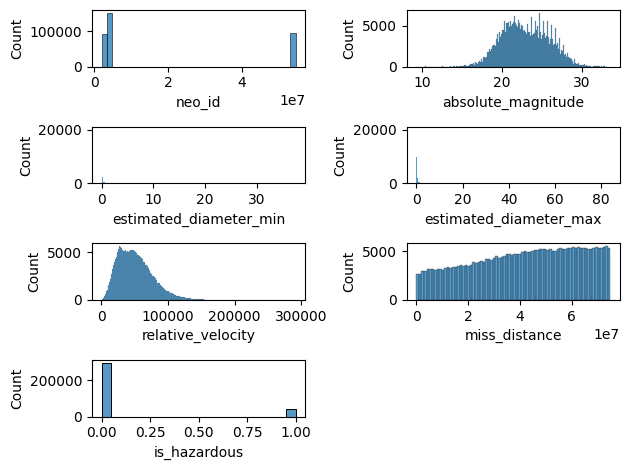

In [24]:
for i in range(len(num_var)):
    plt.subplot(4,2,i+1)
    sns.histplot(df[num_var[i]])
    plt.tight_layout()

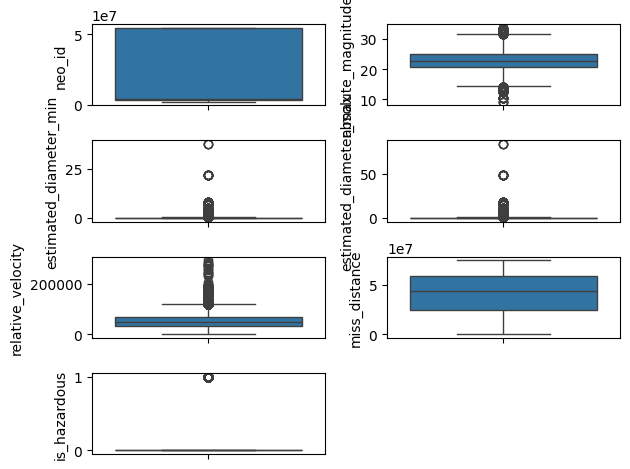

In [25]:
for i in range(len(num_var)):
    plt.subplot(4,2,i+1)
    sns.boxplot(df[num_var[i]])
    plt.tight_layout()

In [39]:
count=[]
for i in range(len(cat_var)):
    a=np.array(df[cat_var[i]].value_counts())
    count.append(a)
print(f"{len(count[0])} categories in {cat_var[0]}\n{len(count[1])} categories in {cat_var[1]}")

33511 categories in name
1 categories in orbiting_body


In [40]:
q1=np.quantile(df["relative_velocity"],0.25)
q3=np.quantile(df["relative_velocity"],0.75)
iqr=q3-q1
lower=q1-1.5*iqr
upper=q3+1.5*iqr
df=df[(df["relative_velocity"]<upper)&(df["relative_velocity"]>lower)]
df.shape

(332723, 9)

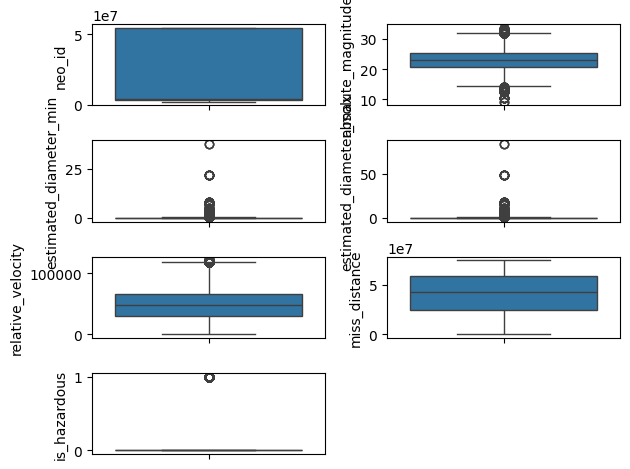

In [41]:
for i in range(len(num_var)):
    plt.subplot(4,2,i+1)
    sns.boxplot(df[num_var[i]])
    plt.tight_layout()